In [5]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from linear_decoder import LinearDecoder  # Import the LinearDecoder class from the linear_decoder module

In [6]:
def find_silent_neurons(spike_data, total_neurons=10000):
    # Extract all neuron IDs that fired
    fired_neurons = set(neuron_id for _, neuron_id in spike_data)
    
    # Create a set of all possible neuron IDs
    all_neurons = set(range(total_neurons))
    
    # Find neurons that didn't fire
    silent_neurons = all_neurons - fired_neurons
    
    return sorted(list(silent_neurons))

In [7]:
n_neurons = 10000  # Set the number of neurons
duration = 200  # Set the duration of the simulation in seconds
dt = 0.1  # Set the time step (delta t) in seconds

In [8]:
V_th_std = 2.0

In [9]:
spikes_trials_all = []  # Initialize an empty list to store spike times for all trials
n_trials = 20  # Set the number of trials to simulate
for trial in range(n_trials):  # Loop through each trial
    filename = f"/Users/frazi/scripts/HLIF_7_mac/data/spikes_sine_V_th_std_{V_th_std}_trial_{trial}.pkl"
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    spikes_trials_all.append(data["spikes"])  # Add the generated spike times to the list of all trials

    silent_neurons = find_silent_neurons(data["spikes"])
    print(f"Number of silent neurons: {len(silent_neurons)}")

Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0
Number of silent neurons: 0


In [10]:
tau = 10  # Set the time constant for exponential kernel in milliseconds
lambda_reg = 1e-3  # Set the regularization parameter for ridge regression
rng = np.random.default_rng(2)  # Initialize a random number generator with seed 2

decoder = LinearDecoder(dt, tau, lambda_reg, rng)  # Create a LinearDecoder object with specified parameters

In [11]:
# Preprocess spike data using the decoder's method, applying filtering to all trials
filtered_spikes = decoder.preprocess_data(spikes_trials_all, n_neurons, duration) 

In [12]:
training_trial_indices = list(range(n_trials-2))  # Create a list of indices 0 to 18 for training trials
test_trial_indices = [n_trials-1]  # Use the last trial (index 19) as the test trial

In [13]:
time = np.arange(duration/dt)  # Create a time array from 0 to duration with step size dt
signal = np.zeros((1,int(duration/dt)), dtype=float)  # Initialize a 2D array for two signals
signal[0] = 2*np.sin(5*np.pi*time/10000)  # Set the first signal as a sine wave with frequency 5π/10000

In [14]:
decoder_stim = LinearDecoder(dt, tau, lambda_reg, rng)  # Create a LinearDecoder object with specified parameters
# Perform stratified cross-validation
train_errors_stim, test_errors_stim, all_weights_stim = decoder_stim.stratified_cv(filtered_spikes[:,:,data["input_1_neurons"]], signal, n_splits=10)

# Print average RMSE across all folds for training data
print("Average training RMSE across all folds:")
print(f"     Auditory stimulus: {train_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {train_errors.mean(axis=0)[1]:.4f}")

print()  # Add a blank line for better readability

# Print average RMSE across all folds for test data
print("Average test RMSE across all folds:")
print(f"     Auditory stimulus: {test_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {test_errors.mean(axis=0)[1]:.4f}")

Average training RMSE across all folds:


NameError: name 'train_errors' is not defined

In [17]:
test_errors_stim[:,0].mean()

0.7032152894283384

In [ ]:
rng = np.random.default_rng(np.random.SeedSequence(entropy=654321, spawn_key=(0, 0, 3, int(100*V_th_std))))  # Initialize a random number generator

In [19]:
# Perform stratified cross-validation
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=10)

# Print average RMSE across all folds for training data
print("Average training RMSE across all folds:")
print(f"     Auditory stimulus: {train_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {train_errors.mean(axis=0)[1]:.4f}")

print()  # Add a blank line for better readability

# Print average RMSE across all folds for test data
print("Average test RMSE across all folds:")
print(f"     Auditory stimulus: {test_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {test_errors.mean(axis=0)[1]:.4f}")

Average training RMSE across all folds:
     Auditory stimulus: 0.1620

Average test RMSE across all folds:
     Auditory stimulus: 0.4093


In [62]:
# Perform stratified cross-validation
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=5)

# Print average RMSE across all folds for training data
print("Average training RMSE across all folds:")
print(f"     Auditory stimulus: {train_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {train_errors.mean(axis=0)[1]:.4f}")

print()  # Add a blank line for better readability

# Print average RMSE across all folds for test data
print("Average test RMSE across all folds:")
print(f"     Auditory stimulus: {test_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {test_errors.mean(axis=0)[1]:.4f}")

Average training RMSE across all folds:
     Auditory stimulus: 0.1594

Average test RMSE across all folds:
     Auditory stimulus: 0.4367


In [61]:
test_errors[:,0]

array([[0.42086676],
       [0.4328894 ],
       [0.3570396 ],
       [0.37109319],
       [0.4377928 ],
       [0.41751596],
       [0.40452484],
       [0.37109604],
       [0.44390207],
       [0.40304784]])

In [70]:
np.array(all_weights)[:,:,0].shape

(5, 10000)

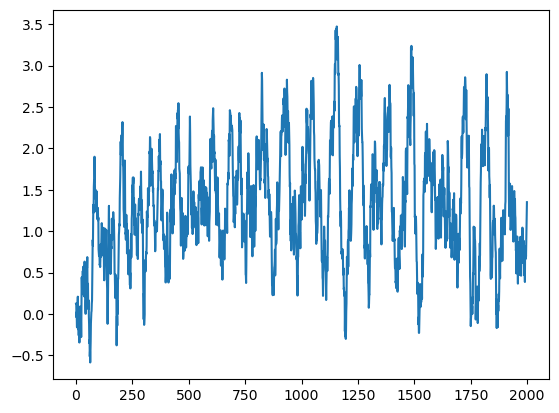

In [57]:
plt.plot(decoder_stim.example_predicted_test[:,0])

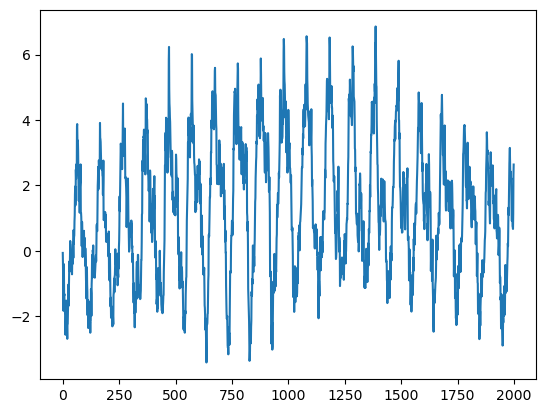

In [40]:
plt.plot(decoder.example_predicted_test[:,0])

In [63]:
# Perform stratified cross-validation
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=5)

# Print average RMSE across all folds for training data
print("Average training RMSE across all folds:")
print(f"     Auditory stimulus: {train_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {train_errors.mean(axis=0)[1]:.4f}")

print()  # Add a blank line for better readability

# Print average RMSE across all folds for test data
print("Average test RMSE across all folds:")
print(f"     Auditory stimulus: {test_errors.mean(axis=0)[0]:.4f}")
# print(f"     Visual stimulus: {test_errors.mean(axis=0)[1]:.4f}")

Average training RMSE across all folds:
     Auditory stimulus: 0.1336

Average test RMSE across all folds:
     Auditory stimulus: 0.9271


In [36]:
train_errors.mean(axis=0)[0]

0.06678102950613965

In [37]:
test_errors.mean(axis=0)[0]

0.460520767159316

In [38]:
decoder.example_predicted_test.shape

(2000, 1)

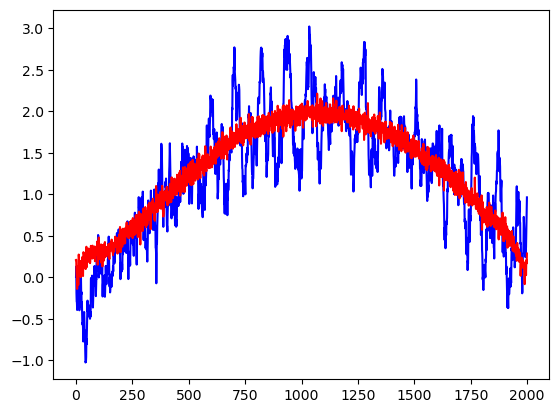

In [23]:
plt.plot(decoder.example_predicted_test[:,0],"b")
plt.plot(decoder.example_predicted_train[:,0],"r")

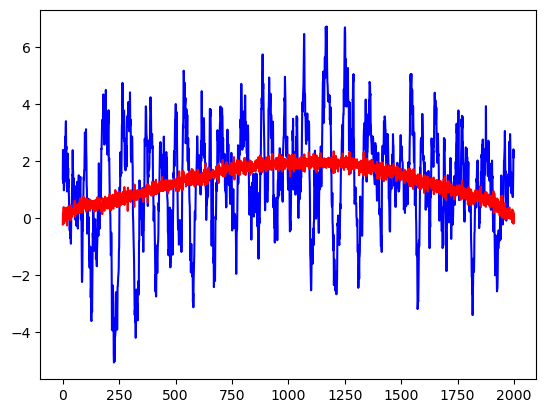

In [58]:
plt.plot(decoder.example_predicted_test[:,0],"b")
plt.plot(decoder.example_predicted_train[:,0],"r")

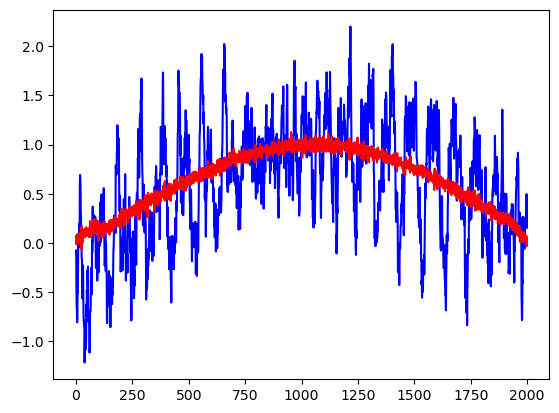

In [48]:
plt.plot(decoder.example_predicted_test[:,0],"b")
plt.plot(decoder.example_predicted_train[:,0],"r")

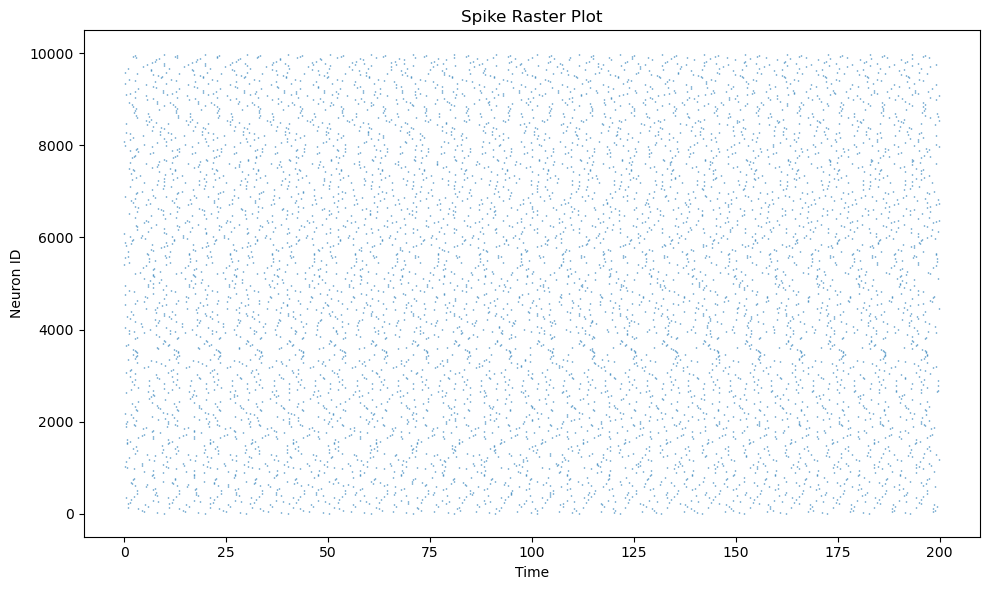

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'spikes' is your list of (spike_time, neuron_id) tuples
spike_times, neuron_ids = zip(*data["spikes"])

# Convert to numpy arrays for easier manipulation
spike_times = np.array(spike_times)
neuron_ids = np.array(neuron_ids)

# Get unique neuron IDs and sort them
unique_neurons = np.unique(neuron_ids)
num_neurons = len(unique_neurons)

# Create a list of spike times for each neuron
neuron_spikes = [spike_times[neuron_ids == nid] for nid in unique_neurons]

# Create the raster plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.eventplot(neuron_spikes, linelengths=0.8, linewidths=1)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Neuron ID')
ax.set_title('Spike Raster Plot')

# Set y-axis ticks to show neuron IDs
# ax.set_yticks(range(num_neurons))
# ax.set_yticklabels(unique_neurons)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
